## Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

# **1. Problem Statement:**

  This project understands how the student's performance (online education) is affected by other variables such as Gender, Age, Education level, Institute Type, IT Student, Location, Load-Shedding, Financial Condition, Internet Type, Network Type, Class Duration, Self, Lms, Device, Adaptivity level.

# **2. Data Collection**

* Data Source - https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

* The data consists of 14 columns and 1205 rows.

**2.1 Import Data and Required Packages**

In [76]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

**Import the CSV Data as Pandas DataFrame**

In [77]:
df = pd.read_csv("/kaggle/input/students-adaptability-level-in-online-education/students_adaptability_level_online_education.csv")

df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


**Shape of the Dataset**

In [78]:
df.shape

(1205, 14)

# **3. Data Checks to Perform**

*   Check Missing values
*   Check data type
*   Check the number of unique values of each column
*   Check statistics of data set
*   Check various categories present in the different categorical column

**3.1 Check Missing Values**

In [79]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

There are no missing values in the dataset.

**3.2 Check Data Types**

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


**3.3 Checking the Number of unique values of each column**

In [81]:
df.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

**3.4 Check Statistics of data set**

In [82]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


# **4. Exploring Data**

In [83]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [84]:
for i in df.columns:
    print(i, ":", df[i].unique().tolist())

Gender : ['Boy', 'Girl']
Age : ['21-25', '16-20', '11-15', '26-30', '6-10', '1-5']
Education Level : ['University', 'College', 'School']
Institution Type : ['Non Government', 'Government']
IT Student : ['No', 'Yes']
Location : ['Yes', 'No']
Load-shedding : ['Low', 'High']
Financial Condition : ['Mid', 'Poor', 'Rich']
Internet Type : ['Wifi', 'Mobile Data']
Network Type : ['4G', '3G', '2G']
Class Duration : ['3-6', '1-3', '0']
Self Lms : ['No', 'Yes']
Device : ['Tab', 'Mobile', 'Computer']
Adaptivity Level : ['Moderate', 'Low', 'High']


In [85]:
# numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 14 categorical features : ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']


**4.1 Which Gender has high ratio level in students in percentage?**

<Axes: ylabel='proportion'>

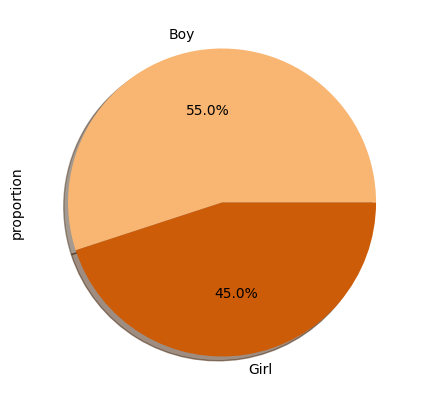

In [86]:
plt.figure(figsize = (8,5))
colors = ['#f9b572','#cd5c08']
df['Gender'].value_counts('Adaptivity Level').plot.pie(colors = colors, autopct = '%1.1f%%',shadow = True)

**4.2 Which device is more reliable in using online education?**

<Axes: ylabel='count'>

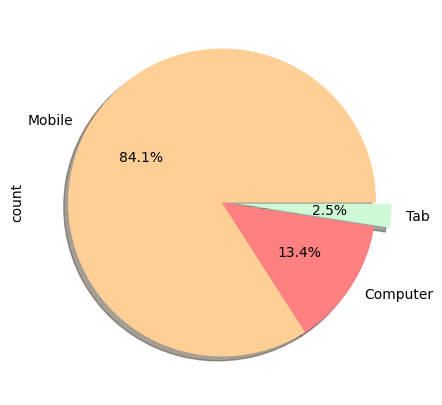

In [87]:
plt.figure(figsize = (8,5))
colors = ('#FFCF96','#FF8080','#CDFAD5')
explode = [0,0,0.1]
df['Device'].value_counts().plot.pie(colors = colors, explode = explode,autopct = '%1.1f%%', shadow = True)

**4.3 Which device has more adaptability to take online education according to gender?**

In [88]:
# Assuming df is your DataFrame
fig = px.sunburst(
    df,
    path=['Adaptivity Level', 'Device', 'Gender'],
    color_discrete_map={'Mid': 'blue', 'Other': 'red'},  # Modify as needed
)

# Set the title
fig.update_layout(title='Sunburst Chart for Adaptivity Level',title_x=0.5)

# Display the chart
fig.show()
  

**4.4 Which age group is more likely to take online education?**

<Figure size 640x480 with 0 Axes>

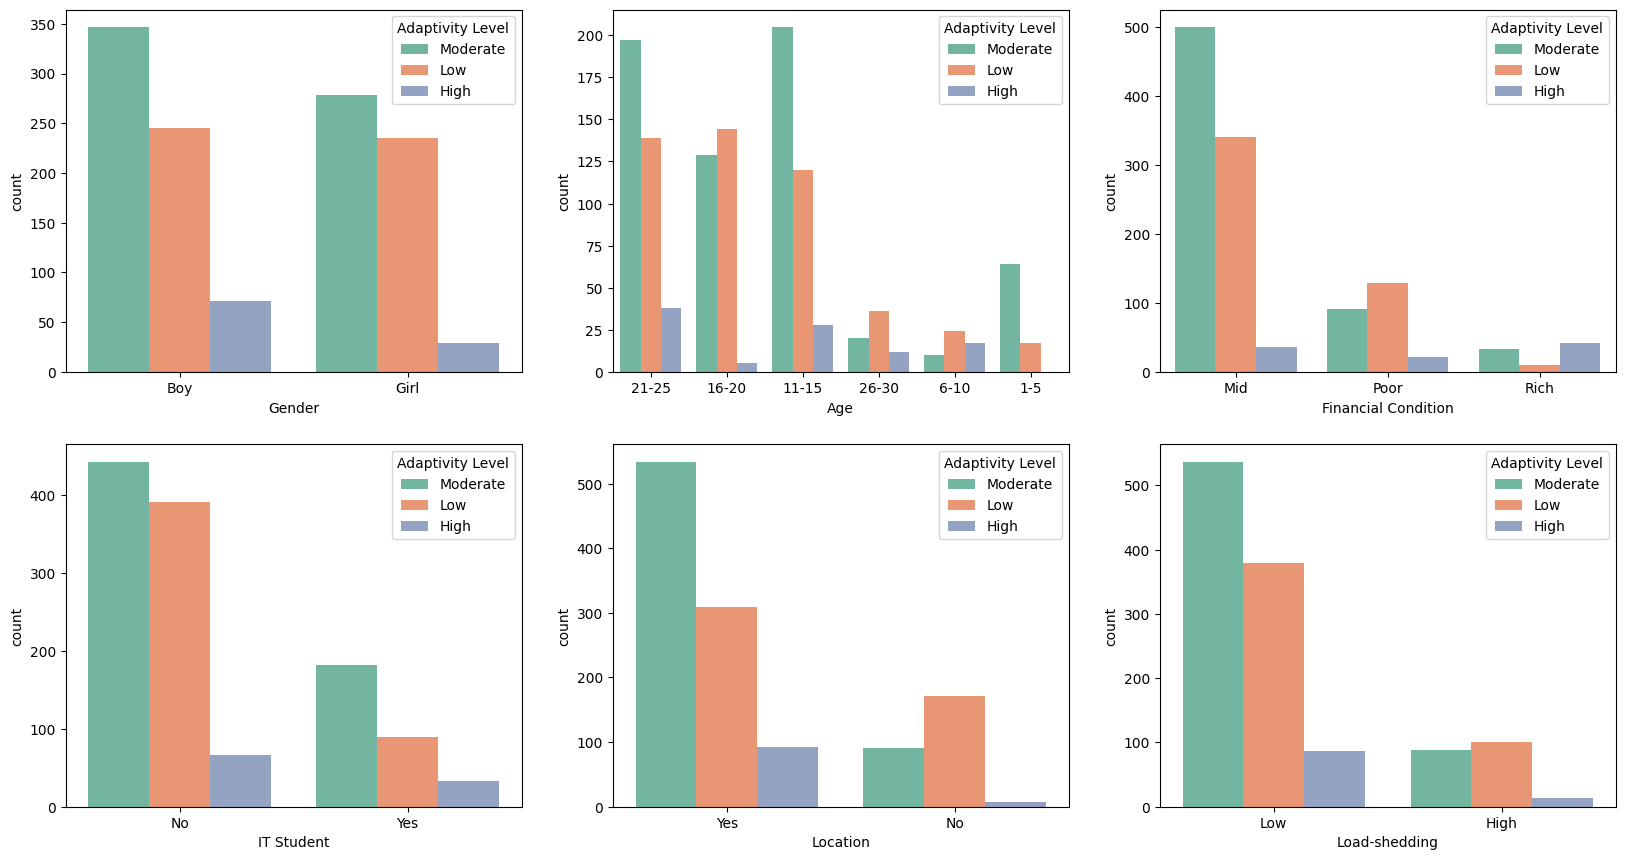

In [89]:
plt.tight_layout()

UserProfile = ['Gender','Age','Financial Condition','IT Student','Location','Load-shedding']
plt.figure(figsize=(20,16))

for i, col in enumerate(UserProfile):
    plt.subplot(3,3,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Adaptivity Level", palette = sns.color_palette("Set2"))

**4.5 According to financial condition, how many students are there who are IT students?**

<Figure size 640x480 with 0 Axes>

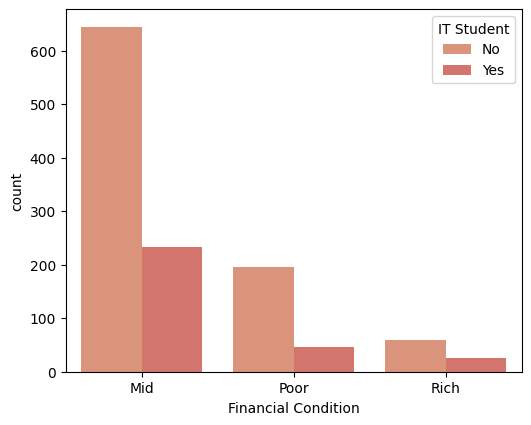

In [90]:
plt.tight_layout()

UserProfile = ['Financial Condition']
plt.figure(figsize=(20,16))

for i, col in enumerate(UserProfile):
    plt.subplot(3,3,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "IT Student", palette = sns.color_palette("flare"))

**4.6 Among education level, which category has mostly low adaptivity level?**

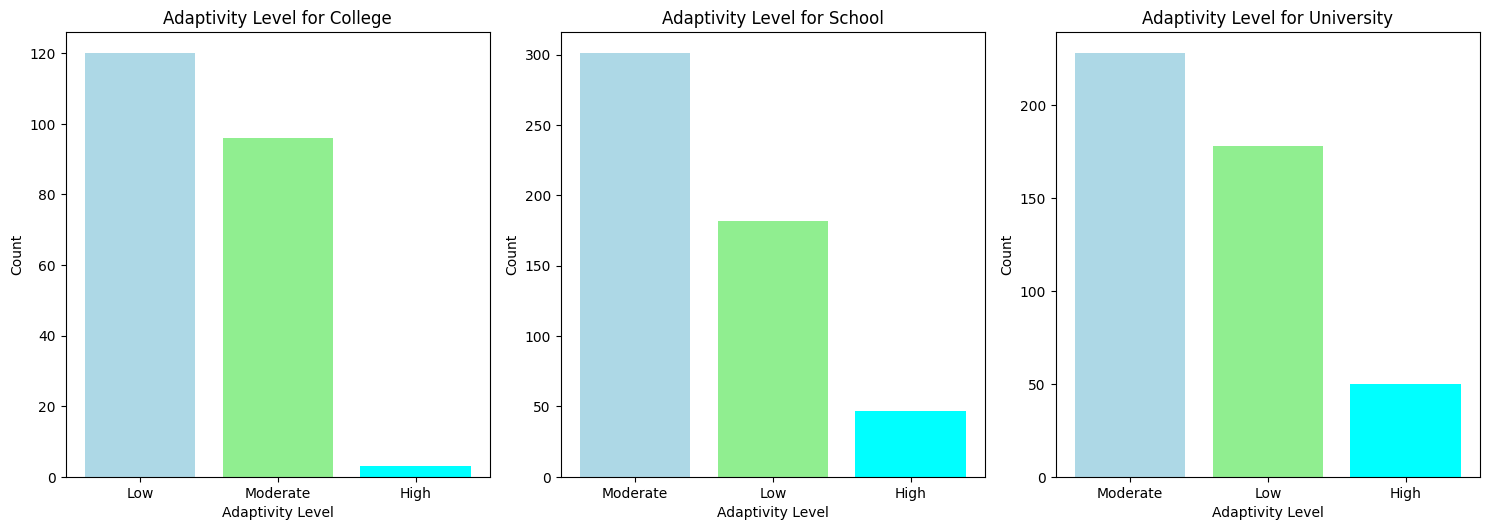

In [91]:
graphs = 1
plt.figure(figsize=(15,10))
c = ['lightblue','lightgreen','cyan']
for i in np.unique(df["Education Level"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(df[df["Education Level"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count,color=c)
    plt.title("Adaptivity Level for " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

**4.7 Among financial condition, which category has mostly low adaptivity level?**

# **5. Feature Engineering**

In [92]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [93]:
#Importing the basic librarires for building model - classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay

**Apply Label Encoder to change all datatype**

In [94]:
# List of categorical columns
categorical_columns = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding',
                       'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the dataset after label encoding
print(df.head())

encoded_data = df.copy()
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(encoded_data[col].value_counts(), end="\n\n")

   Gender  Age  Education Level  Institution Type  IT Student  Location  \
0       0    3                2                 1           0         1   
1       1    3                2                 1           0         1   
2       1    2                0                 0           0         1   
3       1    1                1                 1           0         1   
4       1    2                1                 1           0         1   

   Load-shedding  Financial Condition  Internet Type  Network Type  \
0              1                    0              1             2   
1              0                    0              0             2   
2              1                    0              1             2   
3              1                    0              0             2   
4              1                    1              0             1   

   Class Duration  Self Lms  Device Adaptivity Level  
0               2         0       2         Moderate  
1               1 

In [95]:
df['Adaptivity Level'] = df['Adaptivity Level'].map({'Moderate': 2, 'Low': 1, 'High': 0})

In [96]:
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,0,1,0,1,1,0,1,2,1,0,1,1
1201,1,2,0,1,0,0,0,0,1,2,2,0,1,2
1202,0,1,1,1,0,1,1,0,0,1,1,0,1,2
1203,1,2,0,1,0,0,1,0,1,2,1,0,1,1


In [97]:
X = df.drop(['Adaptivity Level'], axis=1)
y = df['Adaptivity Level']

# **6. Model Training and Evaluation**

In [98]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace X and y with your actual data

# Step 1: Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the training data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now, X_train and y_train contain 64% of the original data for training
# X_val and y_val contain 16% of the original data for validation
# X_test and y_test contain 20% of the original data for testing


In [99]:
# X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [100]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (771, 13)
X_test shape: (241, 13)
y_train shape: (771, 1)
y_test shape: (241, 1)


**Standardizing the data**

In [101]:
# Standardize the data
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

## **Defining the classifier for classification**

**6.1 Logistic Regression**

Train Accuracy : 0.708171206225681
Train Confusion Matrix:
[[ 31  14  20]
 [  0 174 119]
 [ 13  59 341]]


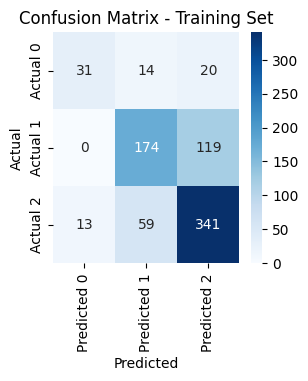

--------------------------------------------------
Test Accuracy : 0.6804979253112033
Test Confusion Matrix:
[[12  5  6]
 [ 1 55 47]
 [ 4 14 97]]


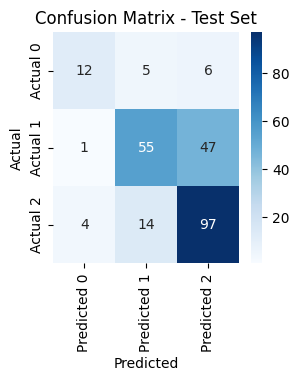

In [102]:
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred)

#check accuracy of training and testing
print("Train Accuracy :", accuracy_score(y_train, log_reg.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, log_reg.predict(X_train)))
#plot confusion matrix for training set
plt.figure(figsize=(3, 3))
cm_train = confusion_matrix(y_train, log_reg.predict(X_train))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

print("-"*50)

print("Test Accuracy :", accuracy_score(y_test, log_reg.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test,log_reg.predict(X_test)))
# Plot the Confusion Matrix for Test Set
plt.figure(figsize=(3, 3))
cm_test = confusion_matrix(y_test, log_reg.predict(X_test))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

**6.2 Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.88      0.82      0.85        84
           2       0.85      0.91      0.88        97

    accuracy                           0.85       193
   macro avg       0.82      0.80      0.81       193
weighted avg       0.86      0.85      0.85       193



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Train Accuracy : 0.9416342412451362
Train Confusion Matrix:
[[ 53   0  12]
 [  3 279  11]
 [  3  16 394]]


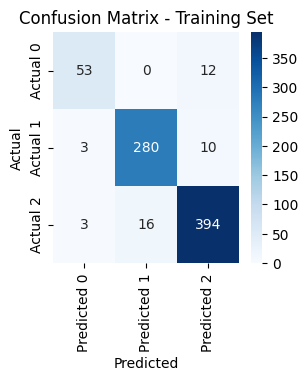

--------------------------------------------------
Test Accuracy : 0.8838174273858921
Test Confusion Matrix:
[[ 18   0   5]
 [  4  88  11]
 [  0   8 107]]


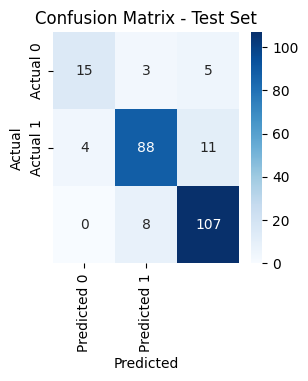

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.92      0.85      0.88       103
           2       0.87      0.93      0.90       115

    accuracy                           0.88       241
   macro avg       0.87      0.86      0.86       241
weighted avg       0.88      0.88      0.88       241



In [103]:
# Initialize the classifier
dt = DecisionTreeClassifier()

# Fit the classifier
dt.fit(X_train, y_train.ravel())  # Removed .values

# Predict
pred = dt.predict(X_val)

# Print classification report
print(classification_report(y_val, pred, zero_division=1))

# Define the parameters for grid search
params = {
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 100, 5),
    'min_samples_split': range(2, 10),
    'criterion': ["gini", "entropy"],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt']
}


# Perform grid search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=0, scoring="accuracy", error_score='raise')

grid_search.fit(X_train, y_train.ravel())  # Removed .values

# Get the best estimator
dt_best = grid_search.best_estimator_

pred = dt.predict(X_test)
accuracy_dt_best = accuracy_score(y_test, pred)

# Function to evaluate the model
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    #plot confusion matrix for training set
    plt.figure(figsize=(3, 3))
    cm_train = confusion_matrix(y_train, dt.predict(X_train))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training Set')
    plt.show()

    print("-" * 50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    # Plot the Confusion Matrix for Test Set
    plt.figure(figsize=(3, 3))
    cm_test = confusion_matrix(y_test, dt.predict(X_test))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

# Evaluate the best model
evaluate_model(dt_best)

# Predict with the best model
pred = dt_best.predict(X_test)

# Print classification report
print(classification_report(y_test, pred, zero_division=1))


**6.3 Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.94      0.87      0.90       103
           2       0.86      0.95      0.90       115

    accuracy                           0.89       241
   macro avg       0.88      0.82      0.85       241
weighted avg       0.89      0.89      0.89       241

Training Accuracy (Random Forest): 0.9429


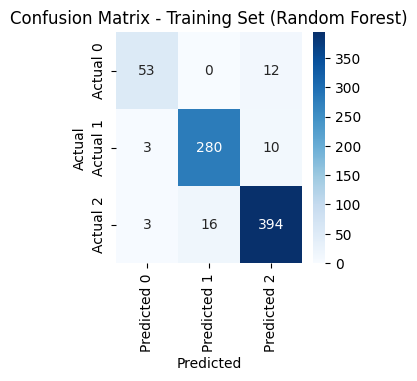

Testing Accuracy (Random Forest): 0.8880


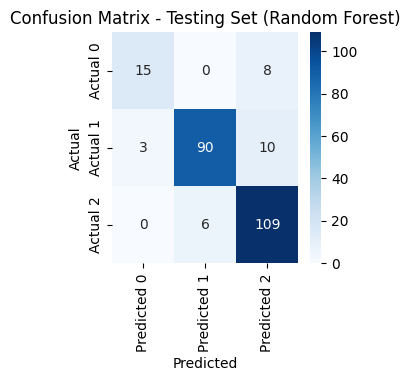

In [104]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Fit the classifier
rf_classifier.fit(X_train_stand, y_train)

# Predict
y_pred_rf = rf_classifier.predict(X_test_stand)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Calculate accuracy
# Calculate training accuracy
accuracy_train_rf = accuracy_score(y_train, rf_classifier.predict(X_train_stand))
print(f"Training Accuracy (Random Forest): {accuracy_train_rf:.4f}")

# Confusion Matrix for Training Set (Random Forest)
cm_train_rf = confusion_matrix(y_train, rf_classifier.predict(X_train_stand))
plt.figure(figsize=(3, 3))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set (Random Forest)')
plt.show()

# Confusion Matrix for Testing Set (Random Forest)
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Testing Accuracy (Random Forest): {accuracy_rf:.4f}")

cm_test_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set (Random Forest)')
plt.show()

**6.4 KNeighbors Classifier**

Train Accuracy: 0.8521
Test Accuracy: 0.7552


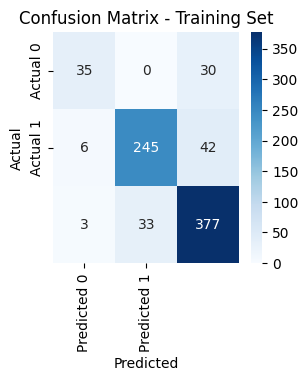

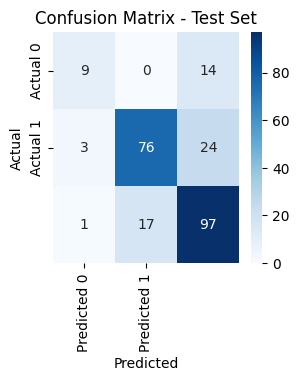

              precision    recall  f1-score   support

           0       0.69      0.39      0.50        23
           1       0.82      0.74      0.78       103
           2       0.72      0.84      0.78       115

    accuracy                           0.76       241
   macro avg       0.74      0.66      0.68       241
weighted avg       0.76      0.76      0.75       241



In [105]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier
knn.fit(X_train, y_train)


accuracy_knn = accuracy_score(y_test, y_pred)
# Define a function for evaluating and plotting confusion matrix
def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
    print(f"Train Accuracy: {train_accuracy:.4f}")

    # Test Accuracy
    test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Confusion Matrix for Training Set
    cm_train = confusion_matrix(y_train, classifier.predict(X_train))
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training Set')
    plt.show()

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, classifier.predict(X_test))
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

    # Classification Report
    pred = classifier.predict(X_test)
    report = classification_report(y_test, pred, zero_division=1)
    print(report)

# Evaluate and plot
evaluate_model(knn, X_train, y_train, X_test, y_test)


**6.8 SVC**

Accuracy: 0.7289


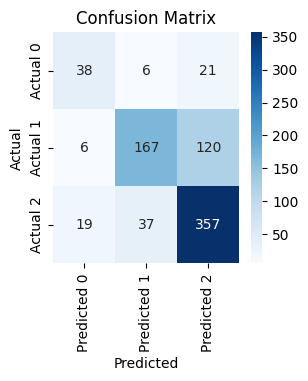

              precision    recall  f1-score   support

        High       0.60      0.58      0.59        65
         Low       0.80      0.57      0.66       293
    Moderate       0.72      0.86      0.78       413

    accuracy                           0.73       771
   macro avg       0.71      0.67      0.68       771
weighted avg       0.74      0.73      0.72       771

Accuracy: 0.7054


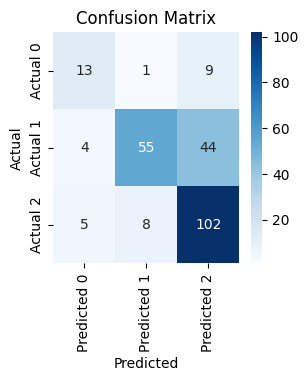

              precision    recall  f1-score   support

        High       0.59      0.57      0.58        23
         Low       0.86      0.53      0.66       103
    Moderate       0.66      0.89      0.76       115

    accuracy                           0.71       241
   macro avg       0.70      0.66      0.66       241
weighted avg       0.74      0.71      0.70       241



In [106]:
# Initialize the SVC classifier
svc = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svc.fit(X_train, y_train)

# Predict on the training set
y_pred_train = svc.predict(X_train)

# Predict on the test set
y_pred_test = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred)
# Define a function for evaluating and plotting confusion matrix
def evaluate_model(classifier, X, y):
    # Accuracy
    accuracy = accuracy_score(y, classifier.predict(X))
    print(f"Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y, classifier.predict(X))
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    report = classification_report(y, classifier.predict(X), target_names=['High', 'Low', 'Moderate'])
    print(report)

# Evaluate and plot for training set
evaluate_model(svc, X_train, y_train)

# Evaluate and plot for testing set
evaluate_model(svc, X_test, y_test)


**6.9 Ensemble Method**

Training Set:
Accuracy: 0.9248
Confusion Matrix:
[[ 40   5  20]
 [  0 275  18]
 [  0  15 398]]


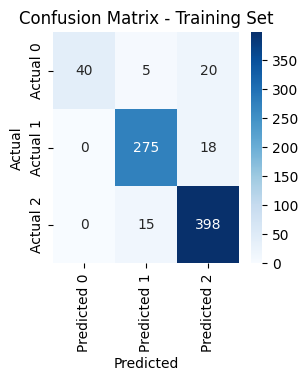

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.62      0.76        65
         Low       0.93      0.94      0.94       293
    Moderate       0.91      0.96      0.94       413

    accuracy                           0.92       771
   macro avg       0.95      0.84      0.88       771
weighted avg       0.93      0.92      0.92       771


Testing Set:
Accuracy: 0.8465
Confusion Matrix:
[[ 12   1  10]
 [  1  83  19]
 [  0   6 109]]


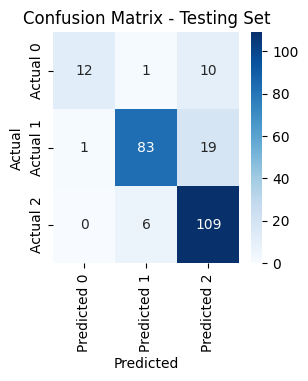

Classification Report:
              precision    recall  f1-score   support

        High       0.92      0.52      0.67        23
         Low       0.92      0.81      0.86       103
    Moderate       0.79      0.95      0.86       115

    accuracy                           0.85       241
   macro avg       0.88      0.76      0.80       241
weighted avg       0.86      0.85      0.84       241



In [107]:

# Initialize base classifiers
rf_classifier = RandomForestClassifier(random_state=42)
lr_classifier = LogisticRegression(max_iter=1500, random_state=42)

# Create a Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('logistic_regression', lr_classifier)
], voting='soft')  # 'soft' for probabilities

# Fit the Voting Classifier
ensemble.fit(X_train, y_train)

# Training Set Evaluation
train_pred = ensemble.predict(X_train)
accuracy_train_ensemble = accuracy_score(y_train, train_pred)

print("Training Set:")
print(f"Accuracy: {accuracy_train_ensemble:.4f}")

cm_train = confusion_matrix(y_train, train_pred)
print("Confusion Matrix:")
print(cm_train)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

report_train = classification_report(y_train, train_pred, target_names=['High', 'Low', 'Moderate'])
print("Classification Report:")
print(report_train)

# Testing Set Evaluation
test_pred = ensemble.predict(X_test)
accuracy_test_ensemble = accuracy_score(y_test, test_pred)

print("\nTesting Set:")
print(f"Accuracy: {accuracy_test_ensemble:.4f}")

cm_test = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:")
print(cm_test)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set')
plt.show()

report_test = classification_report(y_test, test_pred, target_names=['High', 'Low', 'Moderate'])
print("Classification Report:")
print(report_test)


**6.12 Applying Differnt Neural Newtork Model**

In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, input_dim=X_train_stand.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for adaptivity level

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_stand, y_train, epochs=100, batch_size=32, validation_data=(X_test_stand, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_stand, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100
25/25 [==============================] - 2s 10ms/step - loss: 0.9943 - accuracy: 0.4578 - val_loss: 0.8672 - val_accuracy: 0.6971
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.8054 - accuracy: 0.7017 - val_loss: 0.7664 - val_accuracy: 0.6722
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7021 - accuracy: 0.6991 - val_loss: 0.7023 - val_accuracy: 0.6929
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6337 - accuracy: 0.7134 - val_loss: 0.6463 - val_accuracy: 0.7303
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5840 - accuracy: 0.7471 - val_loss: 0.6141 - val_accuracy: 0.7759
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5507 - accuracy: 0.7821 - val_loss: 0.5990 - val_accuracy: 0.7842
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5197 - accuracy: 0.8029 - val_loss: 0.5743 - val_accuracy: 0.8216
Epoch 8/100


**6.13 Training and Validation**

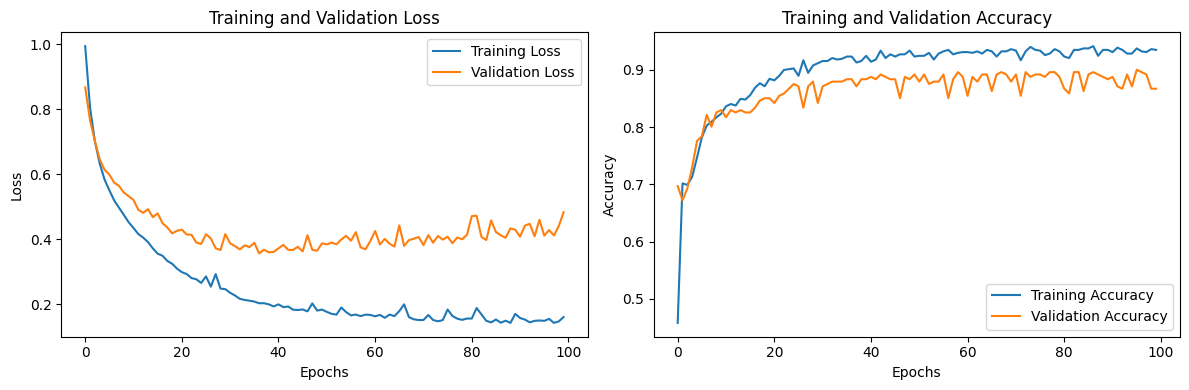

In [109]:

# Extract the training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot training loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


**6.14 Comparison accuracy between each model**

In [110]:

# Define the models and their corresponding accuracies
models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "K-Nearest Neighbors",
    "Support Vector Machine",
    "Ensemble",
    "Neural Network"
]

accuracies = [
    accuracy_log_reg,  
    accuracy_dt_best,  
    accuracy_rf,  
    accuracy_knn,    
    accuracy_svc,  
    accuracy_test_ensemble,     
    accuracy  
]

# Create a DataFrame
comparison_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    
})

# Display the DataFrame
print(comparison_df)


                    Model  Accuracy
0     Logistic Regression  0.680498
1           Decision Tree  0.871369
2           Random Forest  0.887967
3     K-Nearest Neighbors  0.680498
4  Support Vector Machine  0.680498
5                Ensemble  0.846473
6          Neural Network  0.867220


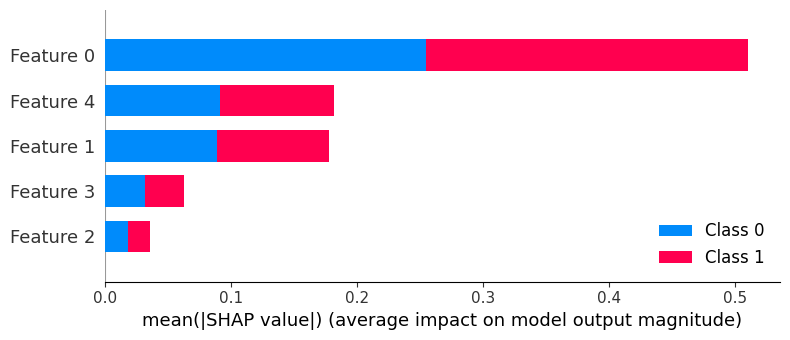

In [114]:
y_pred = optimal_model.predict(X_test)
explainer = shap.TreeExplainer(optimal_model)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(8,6.5))
shap.summary_plot(shap_values, X_test)
# plt.savefig("feature_importance_shap.png", dpi=300)